In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [3]:
from google.colab import userdata
api_key = userdata.get('cos_api_key')

## 머신러닝 피처 추가 데이터 병합

In [18]:
import pandas as pd
df = pd.read_csv('/content/exchange_add_debt.csv')

In [20]:
df

,TIME,원/달러환율,한국 장기 시장 금리,미국 장기 시장 금리,중국 장기 시장 금리,한국 단기 시장 금리,미국 단기 시장 금리,중국 단기 시장 금리,전체 수출 총액,미국 수출 총액,...,한국 GDP 디플레이터,한국 중앙정부 부채 비율,미국 중앙정부 부채 비율,한국 10년 채권수익률,미국 10년 채권수익률,한국 인플레이션율,미국 인플레이션율,인플레이션 격차,실질GDP,실질GDP성장률
0,2000-01-01,1130.32,NaN,6.66,NaN,7.28,5.95,2.72,12162425,2609788,...,67.68900,NaN,33.267642,NaN,NaN,NaN,NaN,NaN,883159.302102,NaN
1,2000-02-01,1129.29,NaN,6.52,NaN,7.13,6.01,2.73,12676042,2554310,...,67.88875,NaN,34.865592,NaN,NaN,NaN,NaN,NaN,876860.243167,NaN
2,2000-03-01,1115.75,NaN,6.26,NaN,7.00,6.14,2.64,14429703,2946821,...,68.08850,NaN,36.463543,NaN,NaN,NaN,NaN,NaN,870598.143103,NaN
3,2000-04-01,1110.01,NaN,5.99,NaN,7.06,6.28,2.64,13522040,2698030,...,68.28825,NaN,38.061493,NaN,NaN,NaN,NaN,NaN,864372.677584,NaN
4,2000-05-01,1121.37,NaN,6.44,NaN,7.14,6.71,2.57,14636755,3167181,...,68.48800,NaN,39.659444,NaN,NaN,NaN,NaN,NaN,858183.526068,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,1352.87,3.00,3.87,2.17,3.50,5.12,2.04,57644555,9937584,...,NaN,NaN,NaN,3.01475,4.77275,2.015540,2.535511,-0.519972,NaN,-1.623182
296,2024-09-01,1332.76,3.01,3.72,2.15,3.52,4.86,2.06,58551357,10416094,...,NaN,NaN,NaN,3.03775,4.60950,1.599694,2.444208,-0.844514,NaN,-1.298546
297,2024-10-01,1365.37,3.07,4.10,2.15,3.43,4.62,2.10,57508046,10396460,...,NaN,NaN,NaN,3.04375,4.07975,1.258197,2.593905,-1.335708,NaN,-0.973909
298,2024-11-01,1394.32,3.01,4.36,2.02,3.42,4.53,2.04,56302773,10376748,...,NaN,NaN,NaN,2.97875,3.97400,1.525372,2.748384,-1.223013,NaN,-0.649273


In [23]:
import pandas as pd
vix = pd.read_csv('/content/CBOE Volatility Index 과거 데이터.csv')

In [24]:
vix

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2000- 01- 01,24.95,24.36,29.00,19.51,NaN,1.26%
1,2000- 02- 01,23.37,24.43,28.12,20.69,NaN,-6.33%
2,2000- 03- 01,24.11,22.65,25.87,19.19,NaN,3.17%
3,2000- 04- 01,26.20,24.99,34.31,23.25,NaN,8.67%
4,2000- 05- 01,23.65,26.07,32.89,23.23,NaN,-9.73%
...,...,...,...,...,...,...,...
295,2024- 08- 01,15.00,16.20,65.73,14.46,NaN,-8.31%
296,2024- 09- 01,16.73,15.87,23.76,14.90,NaN,11.53%
297,2024- 10- 01,23.16,16.96,23.42,16.61,NaN,38.43%
298,2024- 11- 01,13.51,22.96,23.09,13.49,NaN,-41.67%


In [25]:
# 인플레이션율 계산 (전년 동월 대비)
df["한국 인플레이션율"] = df["한국 소비자 물가지수"].pct_change(periods=12) * 100
df["미국 인플레이션율"] = df["미국 소비자 물가지수"].pct_change(periods=12) * 100

# 인플레이션 격차 계산 (한국 - 미국)
df["인플레이션 격차"] = df["한국 인플레이션율"] - df["미국 인플레이션율"]

# 실질 GDP 계산
df["실질GDP"] = df["한국 GDP"] / df["한국 GDP 디플레이터"] * 100

# 실질 GDP 성장률 계산 (전년 동기 대비)
df["실질GDP성장률"] = df["실질GDP"].pct_change(periods=12) * 100

<ipython-input-25-8ffb3afc5d8f>:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["실질GDP성장률"] = df["실질GDP"].pct_change(periods=12) * 100


In [27]:
# 1. 날짜 형식 통일
df["TIME"] = pd.to_datetime(df["TIME"])
vix["TIME"] = pd.to_datetime(vix["날짜"])

# 2. 병합 (왼쪽 기준: df 유지, vix 추가)
df_merged = pd.merge(df, vix, on="TIME", how="left")

In [28]:
df_merged

,TIME,원/달러환율,한국 장기 시장 금리,미국 장기 시장 금리,중국 장기 시장 금리,한국 단기 시장 금리,미국 단기 시장 금리,중국 단기 시장 금리,전체 수출 총액,미국 수출 총액,...,인플레이션 격차,실질GDP,실질GDP성장률,날짜,종가,시가,고가,저가,거래량,변동 %
0,2000-01-01,1130.32,NaN,6.66,NaN,7.28,5.95,2.72,12162425,2609788,...,NaN,883159.302102,NaN,2000- 01- 01,24.95,24.36,29.00,19.51,NaN,1.26%
1,2000-02-01,1129.29,NaN,6.52,NaN,7.13,6.01,2.73,12676042,2554310,...,NaN,876860.243167,NaN,2000- 02- 01,23.37,24.43,28.12,20.69,NaN,-6.33%
2,2000-03-01,1115.75,NaN,6.26,NaN,7.00,6.14,2.64,14429703,2946821,...,NaN,870598.143103,NaN,2000- 03- 01,24.11,22.65,25.87,19.19,NaN,3.17%
3,2000-04-01,1110.01,NaN,5.99,NaN,7.06,6.28,2.64,13522040,2698030,...,NaN,864372.677584,NaN,2000- 04- 01,26.20,24.99,34.31,23.25,NaN,8.67%
4,2000-05-01,1121.37,NaN,6.44,NaN,7.14,6.71,2.57,14636755,3167181,...,NaN,858183.526068,NaN,2000- 05- 01,23.65,26.07,32.89,23.23,NaN,-9.73%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,1352.87,3.00,3.87,2.17,3.50,5.12,2.04,57644555,9937584,...,-0.519972,NaN,-1.623182,2024- 08- 01,15.00,16.20,65.73,14.46,NaN,-8.31%
296,2024-09-01,1332.76,3.01,3.72,2.15,3.52,4.86,2.06,58551357,10416094,...,-0.844514,NaN,-1.298546,2024- 09- 01,16.73,15.87,23.76,14.90,NaN,11.53%
297,2024-10-01,1365.37,3.07,4.10,2.15,3.43,4.62,2.10,57508046,10396460,...,-1.335708,NaN,-0.973909,2024- 10- 01,23.16,16.96,23.42,16.61,NaN,38.43%
298,2024-11-01,1394.32,3.01,4.36,2.02,3.42,4.53,2.04,56302773,10376748,...,-1.223013,NaN,-0.649273,2024- 11- 01,13.51,22.96,23.09,13.49,NaN,-41.67%


In [29]:
df_merged.drop(columns='날짜')

,TIME,원/달러환율,한국 장기 시장 금리,미국 장기 시장 금리,중국 장기 시장 금리,한국 단기 시장 금리,미국 단기 시장 금리,중국 단기 시장 금리,전체 수출 총액,미국 수출 총액,...,미국 인플레이션율,인플레이션 격차,실질GDP,실질GDP성장률,종가,시가,고가,저가,거래량,변동 %
0,2000-01-01,1130.32,NaN,6.66,NaN,7.28,5.95,2.72,12162425,2609788,...,NaN,NaN,883159.302102,NaN,24.95,24.36,29.00,19.51,NaN,1.26%
1,2000-02-01,1129.29,NaN,6.52,NaN,7.13,6.01,2.73,12676042,2554310,...,NaN,NaN,876860.243167,NaN,23.37,24.43,28.12,20.69,NaN,-6.33%
2,2000-03-01,1115.75,NaN,6.26,NaN,7.00,6.14,2.64,14429703,2946821,...,NaN,NaN,870598.143103,NaN,24.11,22.65,25.87,19.19,NaN,3.17%
3,2000-04-01,1110.01,NaN,5.99,NaN,7.06,6.28,2.64,13522040,2698030,...,NaN,NaN,864372.677584,NaN,26.20,24.99,34.31,23.25,NaN,8.67%
4,2000-05-01,1121.37,NaN,6.44,NaN,7.14,6.71,2.57,14636755,3167181,...,NaN,NaN,858183.526068,NaN,23.65,26.07,32.89,23.23,NaN,-9.73%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,1352.87,3.00,3.87,2.17,3.50,5.12,2.04,57644555,9937584,...,2.535511,-0.519972,NaN,-1.623182,15.00,16.20,65.73,14.46,NaN,-8.31%
296,2024-09-01,1332.76,3.01,3.72,2.15,3.52,4.86,2.06,58551357,10416094,...,2.444208,-0.844514,NaN,-1.298546,16.73,15.87,23.76,14.90,NaN,11.53%
297,2024-10-01,1365.37,3.07,4.10,2.15,3.43,4.62,2.10,57508046,10396460,...,2.593905,-1.335708,NaN,-0.973909,23.16,16.96,23.42,16.61,NaN,38.43%
298,2024-11-01,1394.32,3.01,4.36,2.02,3.42,4.53,2.04,56302773,10376748,...,2.748384,-1.223013,NaN,-0.649273,13.51,22.96,23.09,13.49,NaN,-41.67%


In [32]:
df_merged = df_merged.drop(columns=['날짜', '시가', '고가', '저가', '변동 %', '거래량'])

,TIME,원/달러환율,한국 장기 시장 금리,미국 장기 시장 금리,중국 장기 시장 금리,한국 단기 시장 금리,미국 단기 시장 금리,중국 단기 시장 금리,전체 수출 총액,미국 수출 총액,...,한국 중앙정부 부채 비율,미국 중앙정부 부채 비율,한국 10년 채권수익률,미국 10년 채권수익률,한국 인플레이션율,미국 인플레이션율,인플레이션 격차,실질GDP,실질GDP성장률,종가
0,2000-01-01,1130.32,NaN,6.66,NaN,7.28,5.95,2.72,12162425,2609788,...,NaN,33.267642,NaN,NaN,NaN,NaN,NaN,883159.302102,NaN,24.95
1,2000-02-01,1129.29,NaN,6.52,NaN,7.13,6.01,2.73,12676042,2554310,...,NaN,34.865592,NaN,NaN,NaN,NaN,NaN,876860.243167,NaN,23.37
2,2000-03-01,1115.75,NaN,6.26,NaN,7.00,6.14,2.64,14429703,2946821,...,NaN,36.463543,NaN,NaN,NaN,NaN,NaN,870598.143103,NaN,24.11
3,2000-04-01,1110.01,NaN,5.99,NaN,7.06,6.28,2.64,13522040,2698030,...,NaN,38.061493,NaN,NaN,NaN,NaN,NaN,864372.677584,NaN,26.20
4,2000-05-01,1121.37,NaN,6.44,NaN,7.14,6.71,2.57,14636755,3167181,...,NaN,39.659444,NaN,NaN,NaN,NaN,NaN,858183.526068,NaN,23.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-08-01,1352.87,3.00,3.87,2.17,3.50,5.12,2.04,57644555,9937584,...,NaN,NaN,3.01475,4.77275,2.015540,2.535511,-0.519972,NaN,-1.623182,15.00
296,2024-09-01,1332.76,3.01,3.72,2.15,3.52,4.86,2.06,58551357,10416094,...,NaN,NaN,3.03775,4.60950,1.599694,2.444208,-0.844514,NaN,-1.298546,16.73
297,2024-10-01,1365.37,3.07,4.10,2.15,3.43,4.62,2.10,57508046,10396460,...,NaN,NaN,3.04375,4.07975,1.258197,2.593905,-1.335708,NaN,-0.973909,23.16
298,2024-11-01,1394.32,3.01,4.36,2.02,3.42,4.53,2.04,56302773,10376748,...,NaN,NaN,2.97875,3.97400,1.525372,2.748384,-1.223013,NaN,-0.649273,13.51


In [34]:
df_merged.rename(columns={"종가": "vix"}, inplace=True)


In [35]:
df_merged.to_csv('/content/exchange_final.csv')

In [36]:
df = df_merged

## 머신러닝

In [38]:
from sklearn.preprocessing import MinMaxScaler

# features와 target 구성
features = [ '경제 심리 지수',
            '한국 기준 금리',
            '미국 기준 금리',
            '한국 외환 보유액',
            '한국 실업률',
            '한국 주가지수',
            '미국 주가지수',
            'WTI 유가',
            '두바이 유가',
            'Brent 유가',
            '천연가스 가격',
            '유연탄 가격',
            '철광석 가격',
            '구리 가격',
            '알루미늄 가격',
            '니켈 가격',
            '아연 가격',
            '금 가격',
            '대두 가격',
            '옥수수 가격',
            '소맥 가격',
            '원당 가격',
            '원면 가격',
            '외국인 투자 금액',
            '한국 경상수지',
            '한국 인플레이션율',
            '미국 인플레이션율',
            '인플레이션 격차',
            '실질GDP',
            '실질GDP성장률',
            '한국 10년 채권수익률',
            '미국 10년 채권수익률',
            'vix']
target = ['원/달러환율']

In [41]:
# feature + target 전체를 포함한 데이터셋에서 보간
df_ml_full = df[features + target].copy()

# 선형 보간 (시계열 기준으로 앞뒤 선형 연결)
df_ml = df_ml_full.interpolate(method='linear')

# 혹시 남아있는 결측치 제거
df_ml = df_ml.dropna()

# 결과 확인
print("✅ 보간 후 데이터 shape:", df_ml.shape)
print("✅ 남은 결측치:\n", df_ml.isnull().sum().sort_values(ascending=False).head())

✅ 보간 후 데이터 shape: (240, 34)
✅ 남은 결측치:
 경제 심리 지수     0
한국 기준 금리     0
미국 기준 금리     0
한국 외환 보유액    0
한국 실업률       0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.268e+03, tolerance: 3.379e+02
  model = cd_fast.enet_coordinate_descent(


✅ 선택된 주요 피처 (Lasso 기준):
 - 경제 심리 지수
 - 한국 기준 금리
 - 미국 기준 금리
 - 한국 실업률
 - 한국 주가지수
 - 미국 주가지수
 - WTI 유가
 - 두바이 유가
 - Brent 유가
 - 천연가스 가격
 - 유연탄 가격
 - 철광석 가격
 - 구리 가격
 - 알루미늄 가격
 - 니켈 가격
 - 아연 가격
 - 금 가격
 - 대두 가격
 - 옥수수 가격
 - 소맥 가격
 - 원당 가격
 - 원면 가격
 - 외국인 투자 금액
 - 한국 경상수지
 - 미국 인플레이션율
 - 인플레이션 격차
 - 실질GDP
 - 실질GDP성장률
 - 한국 10년 채권수익률
 - vix


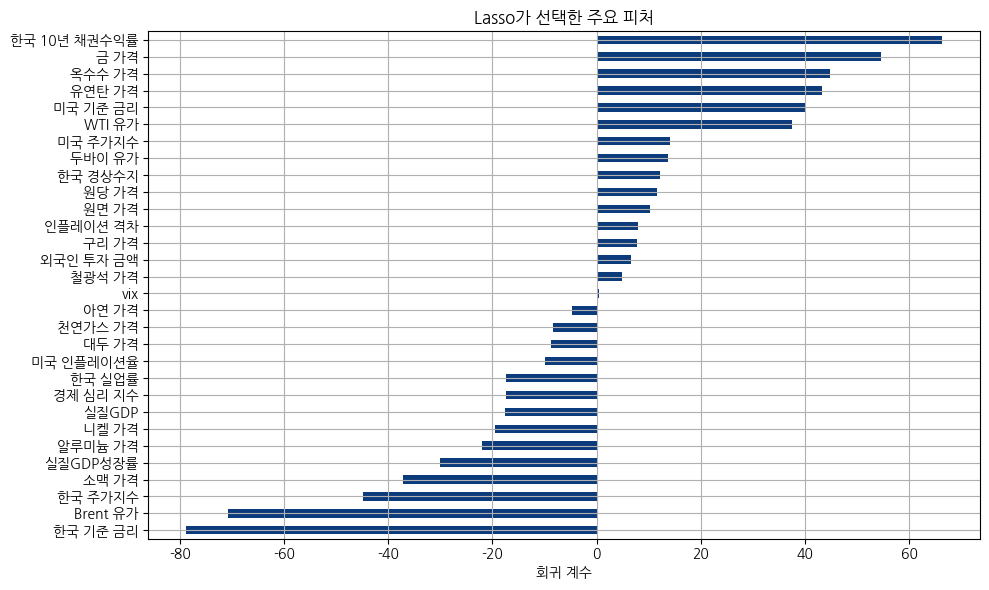

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np

# 1. 입력/타겟 분리
X = df_ml[features]
y = df_ml[target[0]]

# 2. 스케일링 (Lasso는 정규화 필수!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. LassoCV 모델 생성 및 학습 (교차검증 포함)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# 4. 결과 정리 (계수가 0이 아닌 변수만 선택)
coef = pd.Series(lasso.coef_, index=features)
selected_features = coef[coef != 0].index.tolist()

# 5. 출력
print("✅ 선택된 주요 피처 (Lasso 기준):")
for f in selected_features:
    print(f" - {f}")

# 시각화 (선택된 피처만)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coef[coef != 0].sort_values().plot(kind='barh', color='#0b3b7b')
plt.title("Lasso가 선택한 주요 피처")
plt.xlabel("회귀 계수")
plt.grid(True)
plt.tight_layout()
plt.show()

- Lasso 재정비

✅ 선택된 주요 피처 (Lasso 기준):
 - 금 가격
 - 유연탄 가격
 - 한국 10년 채권수익률
 - WTI 유가
 - 옥수수 가격
 - 미국 기준 금리
 - 두바이 유가
 - 원면 가격
 - 미국 주가지수
 - 한국 경상수지
 - 인플레이션 격차
 - 원당 가격
 - 구리 가격
 - 외국인 투자 금액
 - 철광석 가격
 - vix
 - 아연 가격
 - 대두 가격
 - 천연가스 가격
 - 미국 인플레이션율
 - 실질GDP
 - 한국 실업률
 - 경제 심리 지수
 - 알루미늄 가격
 - 니켈 가격
 - 실질GDP성장률
 - 소맥 가격
 - 한국 주가지수
 - 한국 기준 금리
 - Brent 유가


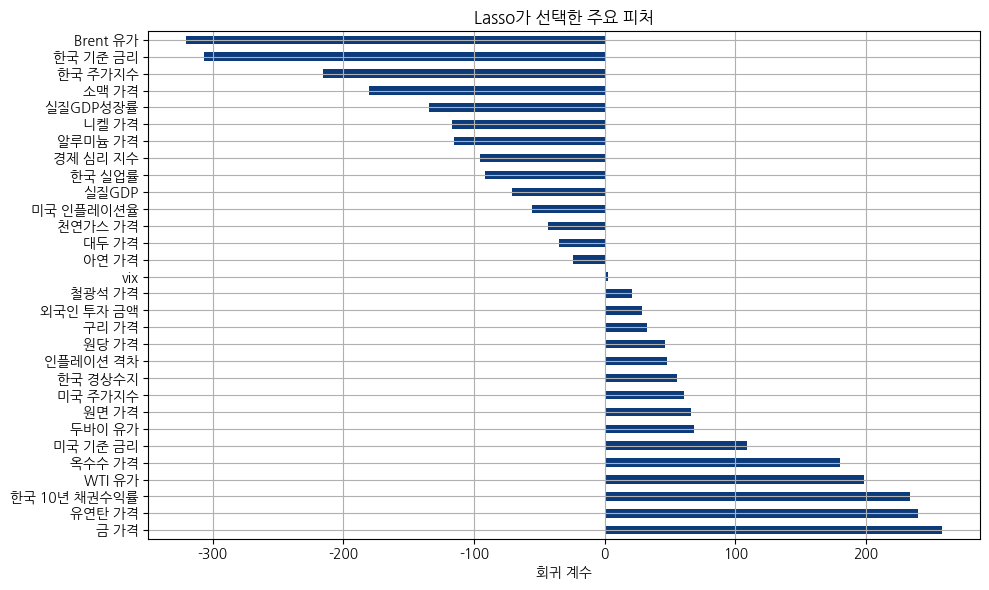

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 준비
X = df_ml[features]
y = df_ml[target[0]]

# 2. 스케일링 (Lasso는 정규화 필수)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. LassoCV (반복 수 증가로 수렴 문제 방지)
lasso = LassoCV(cv=5, max_iter=10000, random_state=42)
lasso.fit(X_scaled, y)

# 4. 결과 정리
coef = pd.Series(lasso.coef_, index=features)
selected_features = coef[coef != 0].sort_values(ascending=False)

# 5. 출력
print("✅ 선택된 주요 피처 (Lasso 기준):")
for f in selected_features.index:
    print(f" - {f}")

# 6. 시각화
plt.figure(figsize=(10, 6))
selected_features.plot(kind='barh', color='#0b3b7b')
plt.title("Lasso가 선택한 주요 피처")
plt.xlabel("회귀 계수")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# # 선택된 피처로 데이터 구성
# lasso_selected = [
#     '한국 10년 채권수익률', '금 가격', '옥수수 가격', '유연탄 가격', '미국 기준 금리',
#     'WTI 유가', '두바이 유가', '미국 주가지수', '한국 경상수지', '원당 가격',
#     '원면 가격', '인플레이션 격차', '구리 가격', '외국인 투자 금액', '철광석 가격',
#     'vix', '아연 가격', '천연가스 가격', '대두 가격', '미국 인플레이션율',
#     '한국 실업률', '경제 심리 지수', '실질GDP', '니켈 가격', '알루미늄 가격',
#     '실질GDP성장률', '소맥 가격', '한국 주가지수', 'Brent 유가', '한국 기준 금리'
# ]

# X = df_ml[lasso_selected]
# y = df_ml['원/달러환율']

## SHAP 확인

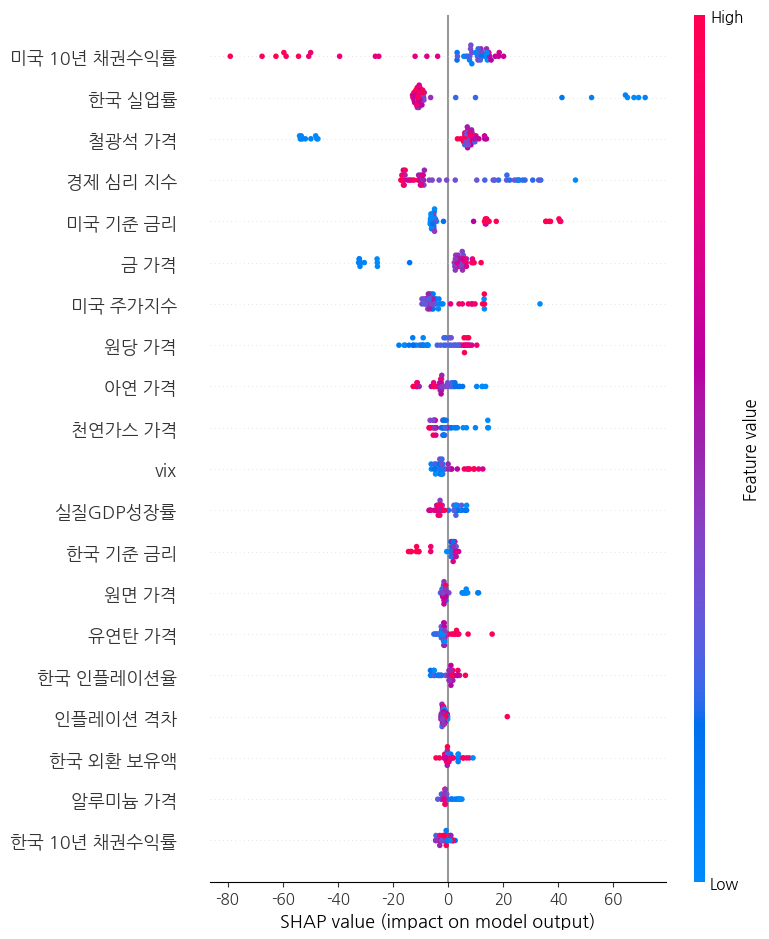

In [51]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 입력 및 타겟 정의
X = df_ml[features]
y = df_ml['원/달러환율']

# 2. 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 4. 모델 학습
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# 5. SHAP 분석 (TreeExplainer는 GPU 불필요)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 6. Summary Plot (피처 영향력 시각화)
shap.summary_plot(shap_values, features=X_test, feature_names=features)


- SHAP 기반 top 11 LSTM

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0921 - val_loss: 0.0499
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0384 - val_loss: 0.0182
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210 - val_loss: 0.0241
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - val_loss: 0.0261
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0108 - val_loss: 0.0245
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0085 - val_loss: 0.0220
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0078 - val_loss: 0.0197
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0068 - val_loss: 0.0179
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0058 - val_loss: 0.0164
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0058 - val_loss: 0.0169
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0049 - val_loss: 0.0147
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0

<ipython-input-55-be3dd95df728>:96: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


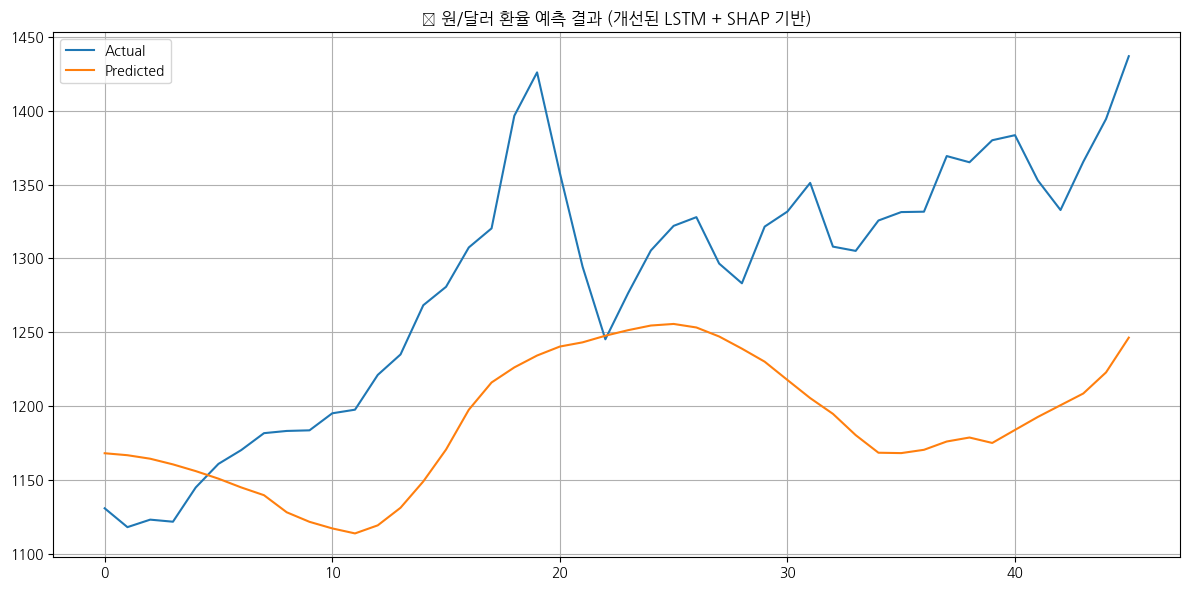

✅ 개선된 LSTM 결과
MSE: 13782.7909
R²: -0.8322


In [55]:
# 0. 랜덤 고정
import os
import random
import numpy as np
import tensorflow as tf

seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 1. 라이브러리
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 2. 피처 선택
important_features = [
    '미국 10년 채권수익률', '한국 실업률', '철광석 가격', '경제 심리 지수',
    '미국 기준 금리', '금 가격', '미국 주가지수', '원당 가격', '아연 가격',
    '천연가스 가격', 'vix'
]
target = ['원/달러환율']

# 3. 데이터 준비
df_lstm = df_ml[important_features + target].dropna()
X = df_lstm[important_features]
y = df_lstm[target[0]]

# 4. 스케일링
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 5. 시퀀스 생성
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

seq_length = 12
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)

# 6. 훈련/테스트 분리
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# 7. 모델 정의 (구조 개선)
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(loss='mse', optimizer='adam')

# 8. 콜백 설정
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 9. 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 10. 예측 및 복원
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# 11. 평가
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# 12. 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("📈 원/달러 환율 예측 결과 (개선된 LSTM + SHAP 기반)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"✅ 개선된 LSTM 결과\nMSE: {mse:.4f}\nR²: {r2:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 0.1867 - val_loss: 0.0177
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0237 - val_loss: 0.0125
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0088 - val_loss: 0.0109
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0094 - val_loss: 0.0106
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0066 - val_loss: 0.0084
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0071 - val_loss: 0.0088
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0064 - val_loss: 0.0088
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/st

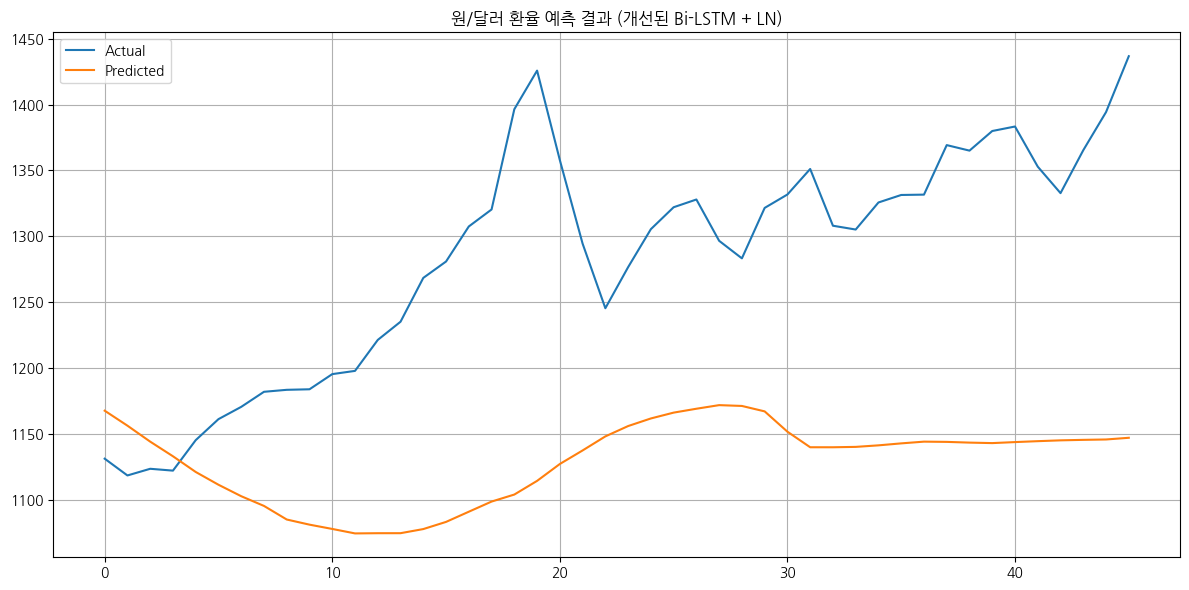

✅ 최종 개선 모델 결과
▶ MSE: 30828.77
▶ R²: -3.0981


In [56]:
import os, random
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 🔒 랜덤 고정
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 📌 SHAP 기반 피처
important_features = [
    '미국 10년 채권수익률', '한국 실업률', '철광석 가격', '경제 심리 지수',
    '미국 기준 금리', '금 가격', '미국 주가지수', '원당 가격', '아연 가격',
    '천연가스 가격', 'vix'
]
target = ['원/달러환율']

# 📊 데이터 준비
df_lstm = df_ml[important_features + target].dropna()
X = df_lstm[important_features]
y = df_lstm[target[0]]

# 🔄 스케일링
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 🧩 시퀀스 생성
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

seq_length = 12
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)

# 📂 train/test 분리
split = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# 🧠 모델 정의 (강화된 구조)
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    LayerNormalization(),
    Dropout(0.2),

    LSTM(64, return_sequences=True),
    LayerNormalization(),
    Dropout(0.2),

    LSTM(32),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.0003)
)

# 📌 조기 종료 콜백
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 🚀 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 📈 예측 및 평가
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# 🎨 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("원/달러 환율 예측 결과 (개선된 Bi-LSTM + LN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"✅ 최종 개선 모델 결과")
print(f"▶ MSE: {mse:.2f}")
print(f"▶ R²: {r2:.4f}")


## Step 0: 타겟 생성
df['원/달러환율_t+1'] = df['원/달러환율'].shift(-1)